In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [9]:
# Paths
base_dir = "Images"
img_size = (128, 128)
batch_size = 32

# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())
num_classes = len(class_names)

print("Data generators setup complete.")

Found 4416 images belonging to 5 classes.
Found 1104 images belonging to 5 classes.
Data generators setup complete.


In [10]:
# Build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


print("Model Complete")

Model Complete


C:\Users\art_r\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Train
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# Save model
model.save("gesture_model.h5")

print("Training Complete")

C:\Users\art_r\anaconda3\envs\ai\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 54s 383ms/step - accuracy: 0.5623 - loss: 1.0110 - val_accuracy: 0.7899 - val_loss: 0.6980
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 51s 370ms/step - accuracy: 0.9796 - loss: 0.0716 - val_accuracy: 0.7699 - val_loss: 1.1315
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 51s 372ms/step - accuracy: 0.9875 - loss: 0.0427 - val_accuracy: 0.7844 - val_loss: 0.7485
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 50s 364ms/step - accuracy: 0.9912 - loss: 0.0257 - val_accuracy: 0.8207 - val_loss: 1.0031
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 50s 363ms/step - accuracy: 0.9965 - loss: 0.0101 - val_accuracy: 0.8197 - val_loss: 1.2151
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 50s 359ms/step - accuracy: 0.9963 - loss: 0.0149 - val_accuracy: 0.8370 - val_loss: 0.7360
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 50s 360ms/step - accuracy: 0.9968 - loss: 0.0106 - val_accuracy: 0.7971 - val_loss: 1.1007
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 49s 355ms/step - accuracy: 0.9965 - loss: 0

Training Complete


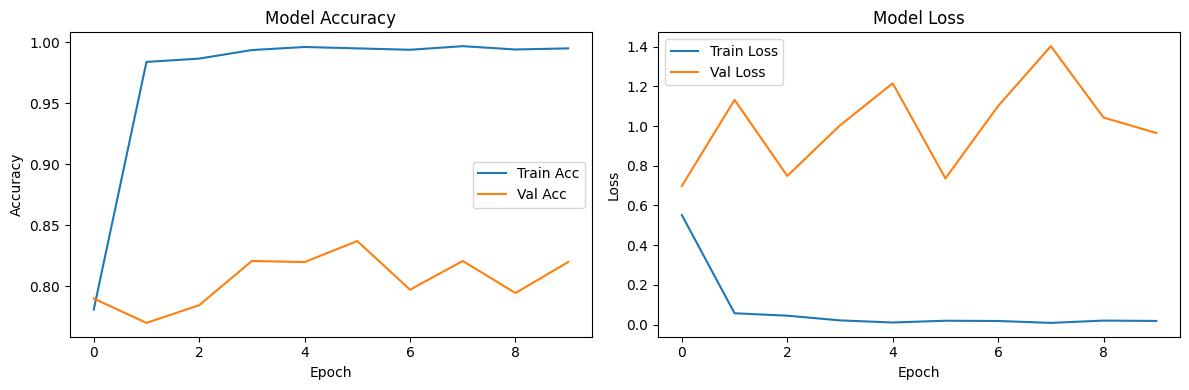

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step


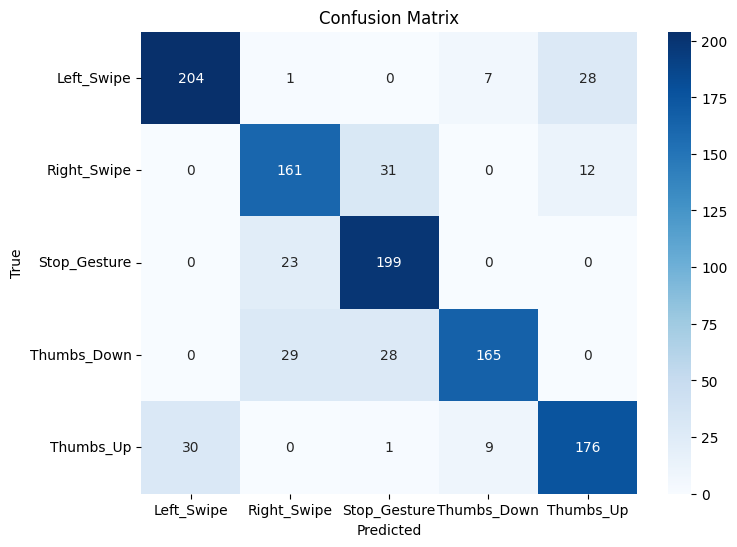

              precision    recall  f1-score   support

  Left_Swipe       0.87      0.85      0.86       240
 Right_Swipe       0.75      0.79      0.77       204
Stop_Gesture       0.77      0.90      0.83       222
 Thumbs_Down       0.91      0.74      0.82       222
   Thumbs_Up       0.81      0.81      0.81       216

    accuracy                           0.82      1104
   macro avg       0.82      0.82      0.82      1104
weighted avg       0.83      0.82      0.82      1104



In [13]:
# Get true and predicted labels
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Optional: Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))


In [17]:
from tensorflow.keras.preprocessing import image

def predict_custom_image(filename):
    img_path = os.path.join('pics', filename)
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    confidence = prediction[predicted_index]

    print(f"Predicted: {class_names[predicted_index]} (Confidence: {confidence:.2f})")
    print(" Complete")
